In [2]:
import urllib.request 
import os 
import tarfile

url = "http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"

filepath = "C:/Users/32388/Desktop/saclImdb_v1.tar.gz" 

if not os.path.isfile(filepath):

    result = urllib.request.urlretrieve(url,filepath)

    print('download:',result)



download: ('C:/Users/32388/Desktop/saclImdb_v1.tar.gz', <http.client.HTTPMessage object at 0x0000022140C6D2C8>)


In [5]:
#depressed the data

if not os.path.exists("C:/Users/32388/Desktop/aclImdb"):

    tfile = tarfile.open("C:/Users/32388/Desktop/saclImdb_v1.tar.gz",'r:gz')

    result = tfile.extractall('C:/Users/32388/Desktop/')


In [1]:
from keras.preprocessing import sequence 
from keras.preprocessing.text import Tokenizer #For building dictionaries

import re
def rm_tags(text):
    re_tags = re.compile(r'<[^>]+>')
    return re_tags.sub(' ',text)


Using TensorFlow backend.


In [2]:
#read data in the file
import os 
def read_files(filetype):
    path = "C:/Users/32388/Desktop/aclImdb/"
    file_list=[]

    positive_path = path + filetype + "/pos/"
    for f in os.listdir(positive_path):
        file_list += [positive_path + f]

    negative_path = path + filetype + "/neg/"
    for f in os.listdir(negative_path):
        file_list += [negative_path + f]       

    print("read",filetype,"files:",len(file_list))
    
    all_labels = ([1]*12500+[0]*12500)

    all_texts = []

    for fi in file_list:
        with open(fi,encoding = 'utf8') as file_input:
            all_texts += [rm_tags(" ".join(file_input.readlines()))]
        
    return all_labels,all_texts


In [3]:
y_train,train_text = read_files("train")

read train files: 25000


In [4]:
y_test,test_text = read_files("test")

read test files: 25000


In [5]:
train_text[0] #The first original text review in training set

'Bromwell High is a cartoon comedy. It ran at the same time as some other programs about school life, such as "Teachers". My 35 years in the teaching profession lead me to believe that Bromwell High\'s satire is much closer to reality than is "Teachers". The scramble to survive financially, the insightful students who can see right through their pathetic teachers\' pomp, the pettiness of the whole situation, all remind me of the schools I knew and their students. When I saw the episode in which a student repeatedly tried to burn down the school, I immediately recalled ......... at .......... High. A classic line: INSPECTOR: I\'m here to sack one of your teachers. STUDENT: Welcome to Bromwell High. I expect that many adults of my age think that Bromwell High is far fetched. What a pity that it isn\'t!'

In [6]:
y_train[0] 

1

In [7]:
token = Tokenizer(num_words=2000)#Creating a dictionary of 2000 words
token.fit_on_texts(train_text)

In [8]:
print(token.document_count)

25000


In [9]:
#print(token.word_index)

In [10]:
x_train_seq = token.texts_to_sequences(train_text)
x_test_seq =  token.texts_to_sequences(test_text)

In [11]:
x_train_seq[0] 

[308,
 6,
 3,
 1068,
 208,
 8,
 29,
 1,
 168,
 54,
 13,
 45,
 81,
 40,
 391,
 109,
 137,
 13,
 57,
 149,
 7,
 1,
 481,
 68,
 5,
 260,
 11,
 6,
 72,
 5,
 631,
 70,
 6,
 1,
 5,
 1,
 1533,
 33,
 66,
 63,
 204,
 139,
 64,
 1229,
 1,
 4,
 1,
 222,
 900,
 28,
 68,
 4,
 1,
 9,
 692,
 2,
 64,
 1533,
 50,
 9,
 215,
 1,
 386,
 7,
 59,
 3,
 1466,
 799,
 5,
 176,
 1,
 391,
 9,
 1236,
 29,
 308,
 3,
 352,
 343,
 142,
 129,
 5,
 27,
 4,
 125,
 1466,
 5,
 308,
 9,
 531,
 11,
 107,
 1467,
 4,
 57,
 554,
 100,
 11,
 308,
 6,
 226,
 47,
 3,
 11,
 8,
 214]

In [12]:
x_train = sequence.pad_sequences(x_train_seq,maxlen=300) #Uniform list length
x_test =sequence.pad_sequences(x_test_seq,maxlen=300)

In [13]:
%matplotlib inline
from keras.datasets import imdb
from keras.models import Sequential 
from keras.layers import Dense 
from keras.layers import Flatten 
from keras.layers.embeddings import Embedding 
from keras.preprocessing import sequence 
import keras 
import numpy as np 

In [14]:
#Fully Connected Feedforward Neural Network
maxword = 300 #only consider the first 300 words in each review to improve efficiency
x_train = sequence.pad_sequences(x_train, maxlen = maxword)
x_test = sequence.pad_sequences(x_test, maxlen = maxword)
vocab_size = np.max([np.max(x_train[i]) for i in range(x_train.shape[0])]) + 1
model = Sequential()
model.add(Embedding(vocab_size, 64, input_length = maxword))
model.add(Flatten())
model.add(Dense(400, activation = 'relu')) #using the ReLU activation function in the hidden layer
model.add(Dense(400, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))#using sigmoid activation function in binary classification

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy']) 
print(model.summary())


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 300, 64)           128000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 19200)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 400)               7680400   
_________________________________________________________________
dense_2 (Dense)              (None, 400)               160400    
_________________________________________________________________
dense_3 (Dense)              (None, 100)               40100     
_________________________________________________________________
dense_4 (De

In [15]:
history=model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 10,batch_size = 200, verbose = 1)
score = model.evaluate(x_test, y_test)


Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 37s 1ms/step - loss: 0.4978 - accuracy: 0.7229 - val_loss: 0.3409 - val_accuracy: 0.8524
Epoch 2/10
25000/25000 [==============================] - 35s 1ms/step - loss: 0.1876 - accuracy: 0.9282 - val_loss: 0.3655 - val_accuracy: 0.8466
Epoch 3/10
25000/25000 [==============================] - 35s 1ms/step - loss: 0.0558 - accuracy: 0.9814 - val_loss: 0.5686 - val_accuracy: 0.8380
Epoch 4/10
25000/25000 [==============================] - 35s 1ms/step - loss: 0.0244 - accuracy: 0.9909 - val_loss: 0.7628 - val_accuracy: 0.8396
Epoch 5/10
25000/25000 [==============================] - 35s 1ms/step - loss: 0.0145 - accuracy: 0.9950 - val_loss: 0.9332 - val_accuracy: 0.8374
Epoch 6/10
25000/25000 [==============================] - 35s 1ms/step - loss: 0.0134 - accuracy: 0.9952 - val_loss: 0.9491 - val_accuracy: 0.8387
Epoch 7/10
25000/25000 [==============================] - 34s 1ms/s

In [16]:
print(score)

[1.1708154512093962, 0.8399999737739563]


In [17]:
history_dict=history.history
history_dict

{'val_loss': [0.3409474524259567,
  0.3654839918613434,
  0.5685973213911056,
  0.7627774889469147,
  0.9331977000236511,
  0.9490760521888733,
  1.031496881723404,
  0.917799521446228,
  1.1387951130867005,
  1.1708154392242431],
 'val_accuracy': [0.852400004863739,
  0.8465999960899353,
  0.8379600048065186,
  0.8396000266075134,
  0.8374000191688538,
  0.8386800289154053,
  0.8422399759292603,
  0.8406800031661987,
  0.8391600251197815,
  0.8399999737739563],
 'loss': [0.4977822897434235,
  0.1875643138885498,
  0.05584838017076254,
  0.024370113227516414,
  0.014549149814993143,
  0.013422392763197422,
  0.008645751203061082,
  0.012254025194561109,
  0.008019462254131212,
  0.00430254411327769],
 'accuracy': [0.72292,
  0.92816,
  0.98136,
  0.99092,
  0.99504,
  0.99524,
  0.99724,
  0.99584,
  0.99744,
  0.99864]}

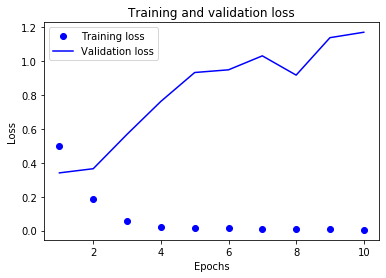

In [18]:
import matplotlib.pyplot as plt
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']
epochs=range(1,len(loss_values)+1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

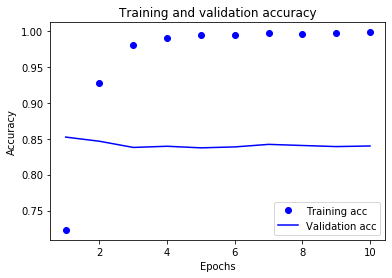

In [19]:
#plot training accuracy and verification accuracy

plt.clf()

acc = history_dict['accuracy']

val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')

plt.plot(epochs, val_acc, 'b', label='Validation acc')

plt.title('Training and validation accuracy')

plt.xlabel('Epochs')

plt.ylabel('Accuracy')

plt.legend()

plt.show()


In [20]:
#CNN
from keras.models import Sequential 
from keras.layers.embeddings import Embedding 
from keras.preprocessing import sequence 
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv1D, MaxPooling1D
model = Sequential()
model.add(Embedding(vocab_size, 64, input_length = maxword))
model.add(Conv1D(filters = 64, kernel_size = 4, padding = 'same', activation = 'relu'))
model.add(MaxPooling1D(pool_size = 2))
model.add(Dropout(0.2))
model.add(Conv1D(filters = 128, kernel_size = 4, padding = 'same',activation = 'relu'))
model.add(MaxPooling1D(pool_size = 2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])
print(model.summary())



Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 300, 64)           128000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 300, 64)           16448     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 150, 64)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 150, 64)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 150, 128)          32896     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 75, 128)           0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 75, 128)         

In [21]:
history=model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 10, batch_size = 200)
scores = model.evaluate(x_test, y_test, verbose = 1)
print(scores)


Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 64s 3ms/step - loss: 0.5449 - accuracy: 0.6834 - val_loss: 0.3106 - val_accuracy: 0.8679
Epoch 2/10
25000/25000 [==============================] - 64s 3ms/step - loss: 0.3194 - accuracy: 0.8638 - val_loss: 0.3030 - val_accuracy: 0.8720
Epoch 3/10
25000/25000 [==============================] - 64s 3ms/step - loss: 0.2779 - accuracy: 0.8854 - val_loss: 0.3176 - val_accuracy: 0.8622
Epoch 4/10
25000/25000 [==============================] - 64s 3ms/step - loss: 0.2501 - accuracy: 0.8986 - val_loss: 0.2919 - val_accuracy: 0.8752
Epoch 5/10
25000/25000 [==============================] - 65s 3ms/step - loss: 0.2276 - accuracy: 0.9085 - val_loss: 0.2662 - val_accuracy: 0.8873
Epoch 6/10
25000/25000 [==============================] - 63s 3ms/step - loss: 0.2083 - accuracy: 0.9166 - val_loss: 0.2722 - val_accuracy: 0.8887
Epoch 7/10
25000/25000 [==============================] - 63s 3ms/st

In [22]:
history_dict=history.history
history_dict

{'val_loss': [0.3106050560474396,
  0.303037929058075,
  0.3175638226866722,
  0.2919280333518982,
  0.26620950758457185,
  0.2721692677736282,
  0.2823220785856247,
  0.29030712628364563,
  0.3967905807197094,
  0.30871114367246627],
 'val_accuracy': [0.8678799867630005,
  0.8719599843025208,
  0.8622000217437744,
  0.8751599788665771,
  0.8873199820518494,
  0.8887199759483337,
  0.8870800137519836,
  0.8823999762535095,
  0.8393599987030029,
  0.883400022983551],
 'loss': [0.5448609778881073,
  0.31936869394779205,
  0.277858367562294,
  0.2501042640209198,
  0.22764986848831176,
  0.20833857303857803,
  0.1938052472472191,
  0.17913617783784866,
  0.15878294467926024,
  0.14546901056170464],
 'accuracy': [0.6834,
  0.86376,
  0.8854,
  0.89856,
  0.90852,
  0.91664,
  0.92432,
  0.93092,
  0.93776,
  0.94588]}

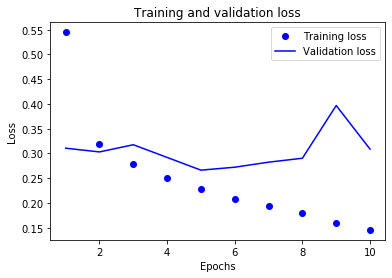

In [23]:
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']
epochs=range(1,len(loss_values)+1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

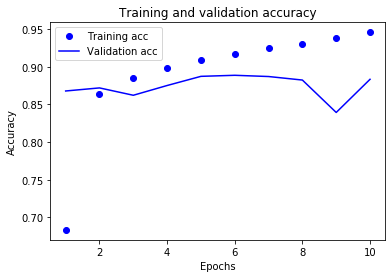

In [24]:
plt.clf()

acc = history_dict['accuracy']

val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')

plt.plot(epochs, val_acc, 'b', label='Validation acc')

plt.title('Training and validation accuracy')

plt.xlabel('Epochs')

plt.ylabel('Accuracy')

plt.legend()

plt.show()


In [25]:
#LSTM network
from keras.layers import LSTM
model = Sequential()
model.add(Embedding(vocab_size, 64, input_length = maxword))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])
print(model.summary())


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 300, 64)           128000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 300, 64)           33024     
_________________________________________________________________
dropout_3 (Dropout)          (None, 300, 64)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 33        
Total params: 173,473
Trainable params: 173,473
Non-trainable params: 0
________________________________________________

In [26]:
history=model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 5, batch_size = 200)
scores = model.evaluate(x_test, y_test)

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 193s 8ms/step - loss: 0.4940 - accuracy: 0.7678 - val_loss: 0.3362 - val_accuracy: 0.8582
Epoch 2/5
25000/25000 [==============================] - 192s 8ms/step - loss: 0.3509 - accuracy: 0.8554 - val_loss: 0.3058 - val_accuracy: 0.8718
Epoch 3/5
25000/25000 [==============================] - 193s 8ms/step - loss: 0.3136 - accuracy: 0.8738 - val_loss: 0.3348 - val_accuracy: 0.8634
Epoch 4/5
25000/25000 [==============================] - 194s 8ms/step - loss: 0.2970 - accuracy: 0.8798 - val_loss: 0.2984 - val_accuracy: 0.8730
Epoch 5/5
25000/25000 [==============================] - 72s 3ms/step


In [27]:
history_dict=history.history
history_dict

{'val_loss': [0.3361531422138214,
  0.30575454902648924,
  0.3348146368265152,
  0.29839727568626406,
  0.30288507854938507],
 'val_accuracy': [0.8581600189208984,
  0.8717600107192993,
  0.8633599877357483,
  0.8730000257492065,
  0.8730000257492065],
 'loss': [0.4939816520214081,
  0.3508556607961655,
  0.3135691908597946,
  0.29701463449001314,
  0.28604141366481783],
 'accuracy': [0.76776, 0.8554, 0.87376, 0.8798, 0.8846]}

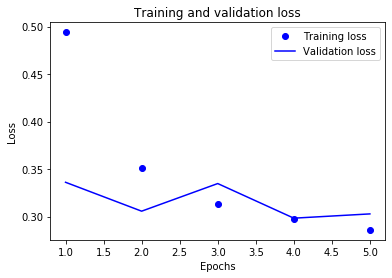

In [28]:
import matplotlib.pyplot as plt
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']
epochs=range(1,len(loss_values)+1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

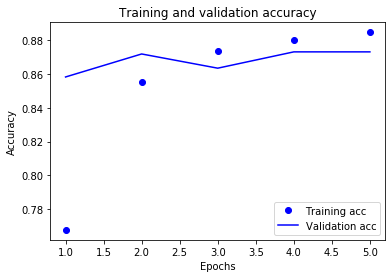

In [29]:
plt.clf()

acc = history_dict['accuracy']

val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')

plt.plot(epochs, val_acc, 'b', label='Validation acc')

plt.title('Training and validation accuracy')

plt.xlabel('Epochs')

plt.ylabel('Accuracy')

plt.legend()

plt.show()

In [30]:
print(scores)

[0.3028850794029236, 0.8730000257492065]


In [31]:
test_comment=[('The big winner of last years Golden Horse Award is undoubtedly sunshine. Won 5 awards for best feature film, best director, best actor, best supporting actor and best editing, and also won the best film of the year in Golden Horse audience vote. This shows that sunshine not only conquers the professional audience, but also is a movie that everyone can understand and love.')]
my_comment_seq = token.texts_to_sequences(test_comment)
pre = sequence.pad_sequences(my_comment_seq,maxlen=300)


In [32]:
pre

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0, 

In [33]:
print(model.predict(pre))

[[0.9858212]]
